### Práctica calificada 3

**Instrucciones generales:**

- Esta evaluación es de carácter individual. No está permitida la colaboración con otros estudiantes ni el intercambio de información durante la realización de la misma.
- La evaluación debe ser completada y entregada antes de la fecha y hora límite especificadas en la plataforma del curso.
- La entrega debe realizarse a través de un repositorio de código alojado en una plataforma como GitHub, GitLab o Bitbucket.
- El enlace al repositorio debe ser compartido con el profesor de la asignatura a través de la plataforma UniVirtual.
- Se evaluará la originalidad y creatividad de las soluciones propuestas por cada estudiante.
- Se valorará positivamente el uso adecuado de conceptos y técnicas aprendidas en el curso para resolver los problemas planteados.
- Está terminantemente prohibido copiar o utilizar código generado por herramientas de generación de lenguaje natural, como modelos de lenguaje masivo (LLM) como GPT-3.

#### Ejemplo de codificación posicional
El objetivo de este notebook es entender la codificación posicional y la similitud coseno. La similitud coseno sigue siendo un enfoque sólido en NLP.

El archivo `texto.txt` es solo para ilustrar los conceptos en el notebook.

In [3]:
#%pip install gensim # Versión Gensim 4.0.0 y superior
import torch
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/abraham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Este código implementa un ejemplo de procesamiento de lenguaje natural (NLP) para crear un modelo de embedding de palabras (Word2Vec) y calcular la similitud coseno entre dos palabras específicas en un texto dado. 

Para que este codigo no de errores se esta usando las siguientes versiones

In [4]:
import sys
import platform

def print_version(module_name):
    try:
        module = sys.modules[module_name]
        version = module.__version__
        print(f"{module_name.capitalize()} versión: {version}")
    except (ImportError, AttributeError) as e:
        print(f"Error al importar {module_name}: {e}")

print("Versión de Python:")
print(platform.python_version())

modules = [
    #"math",
    "numpy",
    "nltk",  
    "gensim",
    "sklearn",  
    "matplotlib",
    #"warnings",
    "torch",  
]

for module_name in modules:
    print_version(module_name)

Versión de Python:
3.10.14
Numpy versión: 1.26.4
Nltk versión: 3.8.1
Gensim versión: 4.3.2
Sklearn versión: 1.5.0
Matplotlib versión: 3.8.4
Torch versión: 2.3.1.post100


Codigo para descargar las caracteristicas del env de conda y replicarlo

In [ ]:
'''
# Instalar el paquete nb_conda:
%pip install nb_conda
# Carga la extensión nb_conda:
%load_ext nb_conda
#Exportar el entorno a un archivo YAML:
%%nb_conda export requirements.yml
'''

In [5]:
import math
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')


dprint=0 # imprime salidas si se establece en 1, predeterminado=0

# archivo ‘text.txt’
muestra = open("texto.txt", "r")
s = muestra.read()

# procesando caracteres de escape
f = s.replace("\n", " ")

data = []

# análisis de oraciones
for i in sent_tokenize(f):
	temp = []
	# tokenizar la oración en palabras
	for j in word_tokenize(i):
		temp.append(j.lower())
	data.append(temp)

# Creando modelo Skip Gram
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 512, window = 5, sg = 1)

# 1-The 2-black 3-cat 4-sat 5-on 6-the 7-couch 8-and 9-the 10-brown 11-dog 12-slept 13-on 14-the 15-rug.
palabra1='black'
palabra2='brown'
pos1=2
pos2=10
a=model2.wv[palabra1]
b=model2.wv[palabra2]

if(dprint==1):
        print(a)

# calcular similitud coseno
dot = np.dot(a, b)
norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
cos = dot / (norma * normb)

aa = a.reshape(1,512)
ba = b.reshape(1,512)
cos_lib = cosine_similarity(aa, ba)

Este código implementa un ejemplo de codificación posicional, una técnica utilizada en modelos como el Transformer para incorporar información sobre la posición de las palabras en la secuencia. La codificación posicional añade un vector a cada palabra en la secuencia que contiene información sobre su posición relativa, permitiendo al modelo entender el orden de las palabras. 

In [6]:
pe1=aa.copy()
pe2=aa.copy()
pe3=aa.copy()
paa=aa.copy()
pba=ba.copy()
d_model=512
max_print=d_model
max_length=20

for i in range(0, max_print,2):
                pe1[0][i] = math.sin(pos1 / (10000 ** ((2 * i)/d_model)))
                paa[0][i] = (paa[0][i]*math.sqrt(d_model))+ pe1[0][i]
                pe1[0][i+1] = math.cos(pos1 / (10000 ** ((2 * i)/d_model)))
                paa[0][i+1] = (paa[0][i+1]*math.sqrt(d_model))+pe1[0][i+1]
                if dprint==1:
                        print(i,pe1[0][i],i+1,pe1[0][i+1])
                        print(i,paa[0][i],i+1,paa[0][i+1])
                        print("\n")

#print(pe1)
# Un método en Pytorch usando torch.exp y math.log :
max_len=max_length
pe = torch.zeros(max_len, d_model)
posicion = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
pe[:, 0::2] = torch.sin(posicion * div_term)
pe[:, 1::2] = torch.cos(posicion * div_term)
#print(pe[:, 0::2])

In [7]:
for i in range(0, max_print,2):
                pe2[0][i] = math.sin(pos2 / (10000 ** ((2 * i)/d_model)))
                pba[0][i] = (pba[0][i]*math.sqrt(d_model))+ pe2[0][i]

                pe2[0][i+1] = math.cos(pos2 / (10000 ** ((2 * i)/d_model)))
                pba[0][i+1] = (pba[0][i+1]*math.sqrt(d_model))+ pe2[0][i+1]

                if dprint==1:
                        print(i,pe2[0][i],i+1,pe2[0][i+1])
                        print(i,paa[0][i],i+1,paa[0][i+1])
                        print("\n")

print(palabra1,palabra2)
cos_lib = cosine_similarity(aa, ba)
print(cos_lib,"similitud de palabras")
cos_lib = cosine_similarity(pe1, pe2)
print(cos_lib,"similitud posicional")
cos_lib = cosine_similarity(paa, pba)
print(cos_lib,"similitud de codificación posicional")

if dprint==1:
        print(palabra1)
        print("embedding")
        print(aa)
        print("codificación posicional")
        print(pe1)
        print("embedding codificada")
        print(paa)

        print(word2)
        print("embedding")
        print(ba)
        print("codificación posicional")
        print(pe2)
        print("embedding codificada")
        print(pba)


black brown
[[0.99951637]] similitud de palabras
[[0.8600013]] similitud posicional
[[0.96224964]] similitud de codificación posicional


### Ejercicios (4 puntos)

1. Implementa una función de codificación posicional en PyTorch que acepte la longitud máxima de la secuencia `(max_len)` y la dimensión del modelo `(d_model)`. La función debe devolver un tensor de codificaciones posicionales.
2. Visualiza las codificaciones posicionales generadas por la función anterior utilizando matplotlib.
3. Aplica la codificación posicional a un conjunto de incrustaciones de palabras. Usa las incrustaciones generadas por Word2Vec y combina estas con las codificaciones posicionales.
4. Compara la similitud coseno entre incrustaciones de palabras antes y después de aplicar la codificación posicional.

In [8]:
## Tus respuestas.

## Tus respuestas.
import torch
import math

def positional_encoding(max_len, d_model):
    pe = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
    
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    
    return pe

# Ejemplo de uso
max_len = 100
d_model = 512
pe = positional_encoding(max_len, d_model)

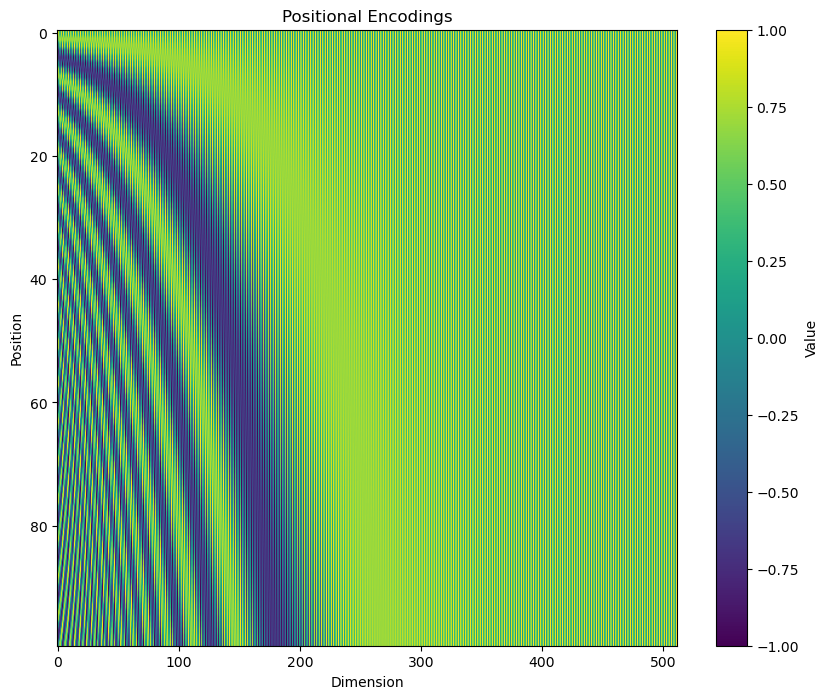

In [9]:
import matplotlib.pyplot as plt

def visualize_positional_encoding(pe):
    plt.figure(figsize=(10, 8))
    plt.imshow(pe.detach().numpy(), cmap='viridis', aspect='auto')
    plt.xlabel('Dimension')
    plt.ylabel('Position')
    plt.colorbar(label='Value')
    plt.title('Positional Encodings')
    plt.show()

# Visualizar las codificaciones posicionales
visualize_positional_encoding(pe)

In [11]:
import torch
import numpy as np

def get_word_embedding(model, word, default_vector=None):
    try:
        return model.wv[word]
    except KeyError:
        print(f"Advertencia: La palabra '{word}' no está en el vocabulario.")
        if default_vector is None:
            # Si no se proporciona un vector predeterminado, usamos un vector aleatorio
            return np.random.rand(model.vector_size)
        return default_vector

# Ejemplo de uso
words = ['black', 'cat', 'sat', 'on', 'the', 'mat']
word_embeddings = torch.tensor([get_word_embedding(model2, word) for word in words])

# Nos aseguramos de que 'pe' tenga suficientes posiciones
max_len = len(words)
d_model = model2.vector_size
pe = positional_encoding(max_len, d_model)

encoded_embeddings = apply_positional_encoding(word_embeddings, pe)

Advertencia: La palabra 'mat' no está en el vocabulario.


Similitud coseno original:
[[ 1.          0.99953678  0.99951696  0.99946079  0.99949479 -0.01513626]
 [ 0.99953678  1.          0.99938213  0.99932919  0.99945303 -0.01345   ]
 [ 0.99951696  0.99938213  1.          0.99939458  0.99949368 -0.01445641]
 [ 0.99946079  0.99932919  0.99939458  1.          0.99931942 -0.01605354]
 [ 0.99949479  0.99945303  0.99949368  0.99931942  1.         -0.01455181]
 [-0.01513626 -0.01345    -0.01445641 -0.01605354 -0.01455181  1.        ]]

Similitud coseno después de la codificación posicional:
[[1.         0.97316935 0.9055842  0.82778008 0.76930947 0.77687764]
 [0.97316935 1.         0.97316022 0.90556506 0.82799104 0.81370398]
 [0.9055842  0.97316022 1.         0.97314695 0.90570525 0.84694275]
 [0.82778008 0.90556506 0.97314695 1.         0.97322149 0.87685979]
 [0.76930947 0.82799104 0.90570525 0.97322149 1.         0.89898793]
 [0.77687764 0.81370398 0.84694275 0.87685979 0.89898793 1.        ]]


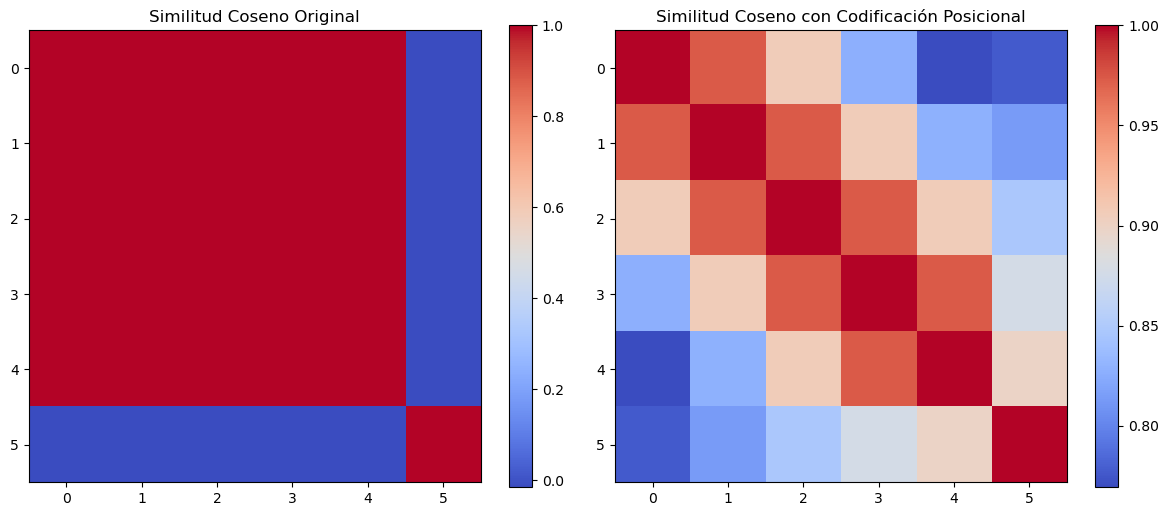

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

def compare_cosine_similarity(original_embeddings, encoded_embeddings):
    original_sim = cosine_similarity(original_embeddings)
    encoded_sim = cosine_similarity(encoded_embeddings)
    
    print("Similitud coseno original:")
    print(original_sim)
    print("\nSimilitud coseno después de la codificación posicional:")
    print(encoded_sim)
    
    # Visualizamos la diferencia
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_sim, cmap='coolwarm')
    plt.title('Similitud Coseno Original')
    plt.colorbar()
    
    plt.subplot(1, 2, 2)
    plt.imshow(encoded_sim, cmap='coolwarm')
    plt.title('Similitud Coseno con Codificación Posicional')
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

# Comparamos similitudes
compare_cosine_similarity(word_embeddings.numpy(), encoded_embeddings.detach().numpy())

### Autoatención

Basado en [Illustrated: Self-Attention](https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a) de Raimi Karim.

¿Qué tienen en común BERT, RoBERTa, ALBERT, SpanBERT, DistilBERT, SesameBERT, SemBERT, MobileBERT, TinyBERT y CamemBERT?  Respuesta: autoatención. No solo estamos hablando de arquitecturas que llevan el nombre "BERT", sino más correctamente de arquitecturas basadas en Transformers. Las arquitecturas basadas en transformers, que se utilizan principalmente en la modelización de tareas de comprensión del lenguaje, evitan el uso de recurrencia en las redes neuronales (RNN) y en su lugar confían completamente en los mecanismos de autoatención para establecer dependencias globales entre las entradas y salidas.

#### Paso 0. ¿Qué es la autoatención?

Si estás pensando si la autoatención es similar a la atención, entonces la respuesta es sí. Fundamentalmente comparten el mismo concepto y
muchas operaciones matemáticas comunes. Un módulo de autoatención toma `n` entradas y devuelve `n` salidas. ¿Qué sucede en este módulo? En términos sencillos, el mecanismo de autoatención permite que las entradas interactúen entre sí (“auto”) y descubran a quién deben prestar más atención ('atención'). Las salidas son agregados de estas interacciones y puntuaciones de atención.

A continuación, vamos a explicar e implementar:

1. Preparar entradas
2. Inicializar pesos
3. Derivar clave, consulta y valor
4. Calcular puntuaciones de atención para la `Entrada 1`
5. Calcular softmax
6. Multiplicar puntuaciones con valores
7. Sumar valores ponderados para obtener la `Salida`
8. Repetir pasos 4-7 para la `Entrada 2` y la `Entrada 3`

In [13]:
import torch

**1. Preparar entradas**

Para este ejercico, por simplicidad, comenzamos con `3` entradas, cada una con una dimensión de `4`.

![texto alternativo](https://miro.medium.com/max/1973/1*hmvdDXrxhJsGhOQClQdkBA.png)

In [14]:
x = [
  [1, 0, 1, 0], # Entrada 1
  [0, 2, 0, 2], # Entrda 2
  [1, 1, 1, 1]  # Entrada 3
 ]
x = torch.tensor(x, dtype=torch.float32)
x

tensor([[1., 0., 1., 0.],
        [0., 2., 0., 2.],
        [1., 1., 1., 1.]])

**Paso 2: Inicializar pesos**

Cada entrada debe tener tres representaciones (ver diagrama abajo). Estas representaciones se llaman clave (naranja), consulta (rojo), y
valor (morado). Para este ejemplo, supongamos que queremos que estas representaciones tengan una dimensión de 3. Debido a que cada entrada
tiene una dimensión de 4, esto significa que cada conjunto de pesos debe tener una forma de $4\times 3$.

![texto del enlace](https://miro.medium.com/max/1975/1*VPvXYMGjv0kRuoYqgFvCag.gif)

In [15]:
w_key = [
  [0, 0, 1],
  [1, 1, 0],
  [0, 1, 0],
  [1, 1, 0]
]
w_query = [
  [1, 0, 1],
  [1, 0, 0],
  [0, 0, 1],
  [0, 1, 1]
]
w_value = [
  [0, 2, 0],
  [0, 3, 0],
  [1, 0, 3],
  [1, 1, 0]
]
w_key = torch.tensor(w_key, dtype=torch.float32)
w_query = torch.tensor(w_query, dtype=torch.float32)
w_value = torch.tensor(w_value, dtype=torch.float32)

print("Pesos para key: \n", w_key)
print("Pesos para query: \n", w_query)
print("Pesos para  value: \n", w_value)

Pesos para key: 
 tensor([[0., 0., 1.],
        [1., 1., 0.],
        [0., 1., 0.],
        [1., 1., 0.]])
Pesos para query: 
 tensor([[1., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 1.]])
Pesos para  value: 
 tensor([[0., 2., 0.],
        [0., 3., 0.],
        [1., 0., 3.],
        [1., 1., 0.]])


**Paso 3: Derivar clave, consulta y valor**

Ahora que tenemos los tres conjuntos de pesos, obtengamos las
representaciones de clave, consulta y valor para cada entrada.

Obteniendo las claves:

 ```

                   [0, 0, 1]
    [1, 0, 1, 0]   [1, 1, 0]   [0, 1, 1]
    [0, 2, 0, 2] x [0, 1, 0] = [4, 4, 0]
    [1, 1, 1, 1]   [1, 1, 0]   [2, 3, 1]
   ```
![texto alternativo](https://miro.medium.com/max/1975/1*dr6NIaTfTxEWzxB2rc0JWg.gif)



Obteniendo los valores:

```

                   [0, 2, 0]
    [1, 0, 1, 0]   [0, 3, 0]   [1, 2, 3]
    [0, 2, 0, 2] x [1, 0, 3] = [2, 8, 0]
    [1, 1, 1, 1]   [1, 1, 0]   [2, 6, 3]
   ```

![texto alternativo](https://miro.medium.com/max/1975/1*5kqW7yEwvcC0tjDOW3Ia-A.gif)


Obteniendo las consultas:

  ```

                   [1, 0, 1]
    [1, 0, 1, 0]   [1, 0, 0]   [1, 0, 2]
    [0, 2, 0, 2] x [0, 0, 1] = [2, 2, 2]
    [1, 1, 1, 1]   [0, 1, 1]   [2, 1, 3]

  ```
![texto alternativo](https://miro.medium.com/max/1975/1*wO_UqfkWkv3WmGQVHvrMJw.gif)

En la práctica, se puede agregar un vector de sesgo al producto de la multiplicación de matrices.

In [16]:
keys = x @ w_key
querys = x @ w_query
values = x @ w_value

print("Keys: \n", keys)
print("Querys: \n", querys)
print("Values: \n", values)


Keys: 
 tensor([[0., 1., 1.],
        [4., 4., 0.],
        [2., 3., 1.]])
Querys: 
 tensor([[1., 0., 2.],
        [2., 2., 2.],
        [2., 1., 3.]])
Values: 
 tensor([[1., 2., 3.],
        [2., 8., 0.],
        [2., 6., 3.]])


**Paso 4: Calcular puntuaciones de atención**

![texto alternativo](https://miro.medium.com/max/1973/1*u27nhUppoWYIGkRDmYFN2A.gif)

Para obtener puntuaciones de atención, comenzamos tomando el producto punto entre la consulta (rojo) de la `Entrada 1` con todas las claves
(naranja), incluida ella misma. Dado que hay 3 representaciones de clave (porque tenemos 3 entradas), obtenemos 3 puntuaciones de atención (azul).

 ```

                [0, 4, 2]
    [1, 0, 2] x [1, 4, 3] = [2, 4, 4]
                [1, 0, 1]
```

Observa que solo usamos la consulta de la `Entrada 1`. Luego repetiremos este mismo paso para las otras consultas.

La operación anterior se conoce como atención por producto punto, una de las varias funciones de puntuación. Otras funciones de puntuación incluyen producto punto escalado y aditivo/concat.

In [17]:
attn_scores = querys @ keys.T
print(attn_scores)

tensor([[ 2.,  4.,  4.],
        [ 4., 16., 12.],
        [ 4., 12., 10.]])


**Paso 5: Calcular softmax**

![texto alternativo](https://miro.medium.com/max/1973/1*jf__2D8RNCzefwS0TP1Kyg.gif)

Aplicar softmax a estas puntuaciones de atención (azul).
    
```
    softmax([2, 4, 4]) = [0.0, 0.5, 0.5]
   ```

In [18]:
from torch.nn.functional import softmax
attn_scores_softmax = softmax(attn_scores, dim=-1)
print(attn_scores_softmax)
# Para mayor legibilidad, aproxime lo anterior de la siguiente manera
attn_scores_softmax = [
      [0.0, 0.5, 0.5],
      [0.0, 1.0, 0.0],
      [0.0, 0.9, 0.1]
    ]
attn_scores_softmax = torch.tensor(attn_scores_softmax)
print(attn_scores_softmax)

tensor([[6.3379e-02, 4.6831e-01, 4.6831e-01],
        [6.0337e-06, 9.8201e-01, 1.7986e-02],
        [2.9539e-04, 8.8054e-01, 1.1917e-01]])
tensor([[0.0000, 0.5000, 0.5000],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.9000, 0.1000]])


**Paso 6: Multiplicar puntuaciones con valores**

![texto alternativo](https://miro.medium.com/max/1973/1*9cTaJGgXPbiJ4AOCc6QHyA.gif)

Las puntuaciones de atención softmax para cada entrada (azul) se multiplican con su correspondiente valor (morado). Esto da como
resultado 3 vectores de alineación (amarillo). En este cuaderno, nos referiremos a ellos como valores ponderados.

```
    1: 0.0 * [1, 2, 3] = [0.0, 0.0, 0.0]
    2: 0.5 * [2, 8, 0] = [1.0, 4.0, 0.0]
    3: 0.5 * [2, 6, 3] = [1.0, 3.0, 1.5]
```

In [19]:
valores_ponderados = values[:,None] * attn_scores_softmax.T[:,:,None]
print(valores_ponderados)

tensor([[[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[1.0000, 4.0000, 0.0000],
         [2.0000, 8.0000, 0.0000],
         [1.8000, 7.2000, 0.0000]],

        [[1.0000, 3.0000, 1.5000],
         [0.0000, 0.0000, 0.0000],
         [0.2000, 0.6000, 0.3000]]])


**Paso 7: Sumar valores ponderados**

![texto alternativo](https://miro.medium.com/max/1973/1*1je5TwhVAwwnIeDFvww3ew.gif)

Tomar todos los valores ponderados (amarillo) y sumarlos elemento por elemento:

```

      [0.0, 0.0, 0.0]
    + [1.0, 4.0, 0.0]
    + [1.0, 3.0, 1.5]
    -----------------
    = [2.0, 7.0, 1.5]

```

El vector resultante `[2.0, 7.0, 1.5]` (verde oscuro) es la `Salida 1`, que se basa en la representación de consulta de la Entrada 1 interactuando con todas las demás claves, incluida ella misma.

**Paso 8: Repetir para `Entrada 2` y `Entrada 3`**

![texto alternativo](https://miro.medium.com/max/1973/1*G8thyDVqeD8WHim_QzjvFg.gif)

La dimensión de consulta y clave debe ser siempre la misma debido a la función de puntuación de producto punto. Sin embargo, la dimensión de valor puede ser diferente de consulta y clave. La salida resultante, por consiguiente, seguirá la dimensión de valor.

In [20]:
salidas = valores_ponderados.sum(dim=0)
print(salidas)

tensor([[2.0000, 7.0000, 1.5000],
        [2.0000, 8.0000, 0.0000],
        [2.0000, 7.8000, 0.3000]])


### Ejercicios (10 puntos)

1 . Extiende el código proporcionado para implementar una capa de multiatención con múltiples cabeceras de atención. Cada cabecera de atención tendrá sus propios pesos y realizará autoatención de forma independiente (2 puntos)

Tareas:

- Divide la entrada en `h` partes, donde `h` es el número de cabeceras de atención.
- Inicializa pesos separados para cada cabecera de atención.
- Realiza autoatención en cada cabecera de atención de forma independiente.
- Concatena las salidas de todas las cabecera de atención.
- Implementa una capa lineal para combinar las salidas concatenadas.

Preguntas:

* ¿Cómo afecta el número de cabeceras de atención al rendimiento y la capacidad del modelo?
* ¿Cuáles son los beneficios y las desventajas de utilizar múltiples cabecera de atención en comparación con una sola cabecera?


2 . Modifica el código para incluir una función que visualice las puntuaciones de atención. Esto puede ayudar a entender cómo el modelo distribuye su atención entre las diferentes entradas (1 punto(

Tareas:

- Implementa una función para visualizar las puntuaciones de atención utilizando matplotlib o cualquier otra biblioteca de visualización.
- Realiza la visualización para diferentes entradas y discute cómo varían las puntuaciones de atención.

Preguntas:

- ¿Qué patrones observas en las puntuaciones de atención para diferentes entradas?
- ¿Cómo puedes interpretar estos patrones en términos de la importancia relativa de las diferentes partes de la entrada?

3 . Implementa la versión escalada del producto punto en el cálculo de las puntuaciones de atención, que es una práctica común en los transformers (2 puntos)

Tareas:

- Modifica el cálculo de las puntuaciones de atención para incluir el factor de escala $frac{1}{\sqrt{d_k}}$ donde $d_k$ es la dimensión de la clave.
- Compara los resultados con y sin escalado del producto punto.

Preguntas:

- ¿Por qué es necesario el escalado del producto punto en el cálculo de las puntuaciones de atención?
- ¿Qué impacto tiene el escalado en la estabilidad numérica y el rendimiento del modelo?.
- 
4 . Implementa y compara otras funciones de puntuación de atención como la atención aditiva y la atención concatenada (2 puntos).

Tareas:

- Implementa la atención aditiva utilizando una red neuronal de una capa.
- Implementa la atención concatenada donde las consultas y las claves se concatenan antes de calcular las puntuaciones de atención.
- Compara el rendimiento y la eficacia de las diferentes funciones de puntuación.

Preguntas:

- ¿Cuáles son las diferencias en el rendimiento de las diferentes funciones de puntuación de atención?
- ¿En qué casos sería preferible usar atención aditiva sobre la atención por producto punto?

5 . Explora técnicas de regularización específicas para modelos de atención, como Dropout en las puntuaciones de atención y Regularización L2. (1 punto)

Tareas:

- Implementa Dropout en las puntuaciones de atención antes de aplicar softmax.
- Añade regularización L2 a los pesos de las consultas, claves y valores.
- Analiza el impacto de estas técnicas de regularización en el rendimiento del modelo.
  
Preguntas:

- ¿Cómo afectan las técnicas de regularización al rendimiento y la generalización del modelo?
- ¿Qué técnicas de regularización son más efectivas para prevenir el sobreajuste en modelos basados en atención?

6 .  Aplica el mecanismo de autoatención y multiatención en tareas específicas de procesamiento de lenguaje natural, como traducción automática, resumen de texto o clasificación de texto. (2 puntos)

Tareas:

- Selecciona una tarea de NLP (por ejemplo, traducción automática).
- Implementa un modelo basado en transformers que utilice autoatención y/o multiatención para esta tarea.
- Entrena y evalúa el modelo en un conjunto de datos relevante.

Preguntas:

- ¿Qué mejoras observas al utilizar autoatención y multiatención en la tarea seleccionada?
- ¿Qué desafíos encontraste al aplicar estos mecanismos de atención a tareas prácticas de NLP?


In [ ]:
## Tus respuestas

### Familia del transformer

1 . Implementación básica de un Transformer (2 puntos)

- Explica la diferencia entre un modelo Transformer y un modelo RNN.
- Describe cómo el mecanismo de autoatención resuelve el problema de las dependencias a largo plazo en las secuencias.
- Implementa un modelo Transformer básico en PyTorch.
- Entrena el Transformer en un conjunto de datos de traducción de secuencia a secuencia (por ejemplo, traducción de inglés a francés).

2 . Comprensión de Transformer-XL (2 puntos)

- Explica las principales diferencias entre Transformer y Transformer-XL.
- Describe cómo Transformer-XL maneja las dependencias a largo plazo de manera más efectiva que el Transformer estándar.
- Implementa una versión simplificada de Transformer-XL en PyTorch.
- Entrena el modelo en un conjunto de datos de texto continuo (por ejemplo, generación de texto).

3 . Uso de BERT para Clasificación de Textos (2 puntos)

- Explica cómo BERT utiliza el mecanismo de atención bidireccional para comprender el contexto de las palabras.
- Describe las diferencias clave entre BERT y un modelo Transformer estándar.
- Utiliza BERT preentrenado para una tarea de clasificación de textos (por ejemplo, análisis de sentimientos).
- Implementa el ajuste fino (fine-tuning) de BERT en un conjunto de datos de clasificación de textos.

## Tus respuestas
#1.1

Los Transformers procesan toda la secuencia en paralelo, mientras que las RNN lo hacen secuencialmente. Esto permite a los Transformers capturar dependencias a largo plazo más eficientemente. Además, los Transformers usan mecanismos de atención en lugar de estados ocultos recurrentes, lo que mejora la retención de información a largo plazo y permite un entrenamiento más rápido en paralelo.

#1.2


La autoatención permite que cada elemento de la secuencia interactúe directamente con todos los demás, independientemente de su posición. Esto resuelve el problema de las dependencias a largo plazo porque:

#2.1

Principales diferencias entre Transformer y Transformer-XL:

- Transformer-XL puede manejar secuencias mucho más largas al utilizar segmentos de contexto recurrentes.
- Transformer-XL introduce un mecanismo de memoria que permite que la información fluya a través de los segmentos de texto.
- Transformer-XL utiliza una codificación de posición relativa en lugar de la codificación de posición absoluta del Transformer original.
- Transformer-XL permite la reutilización de cálculos anteriores, lo que mejora la eficiencia computacional.

#2.2

Cómo Transformer-XL maneja las dependencias a largo plazo:

- Divide el texto en segmentos y procesa cada segmento secuencialmente, manteniendo un estado oculto entre segmentos.
- Utiliza un mecanismo de atención que puede acceder a la información de segmentos anteriores.
- Permite que el modelo entienda la posición relativa de las palabras incluso a través de segmentos diferentes.
- Almacena y reutiliza los estados ocultos de segmentos anteriores, permitiendo conexiones a largo plazo sin aumentar significativamente el costo computacional.

#3.1

Cómo BERT utiliza el mecanismo de atención bidireccional:

- BERT puede atender a palabras tanto a la izquierda como a la derecha en cada capa, a diferencia de los modelos unidireccionales.
- Utiliza una tarea de predicción de palabras enmascaradas que obliga al modelo a considerar el contexto completo.
-  Entrena el modelo para entender las relaciones entre oraciones, mejorando la comprensión del contexto más amplio.

#3.2

Diferencias clave entre BERT y un modelo Transformer estándar:

- BERT es bidireccional desde el inicio, mientras que el Transformer estándar tiene un codificador bidireccional pero un decodificador unidireccional.
- BERT se pre-entrena con MLM y NSP, mientras que el Transformer estándar no tiene una fase de pre-entrenamiento específica.
- Solo utiliza la parte del codificador del Transformer, omitiendo el decodificador.